<a href="https://colab.research.google.com/github/Rouakammoun/E-bank/blob/main/notebook0c690b96f4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'skin-diseases-image-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1532614%2F2529450%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240802%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240802T181456Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D9f0709cc98acef37e53822dfe17f7e4ec722ed860c96a544a85239b24d44d5a3d12fa00aa56f34e71c4a33484b0b08690d219b2310a86c11fbfb223c288f470bfcee4bff5fc8988bf80e77237aa169028a9a3517a78d42f70c89976311095d4afda702d45605e012096c002547904c5c87f2158f9b78b8d945931d40e52a37399c20c2b4d3f0f122e39563e89d6278467105fa1f378dff895fc3bb843117bbd37ba673f812e4769761534f961e11c045fd3a6387d444e294e6cfc30f35f452c7394ecee237fcdbecabb177090d598d797831b894d1f8035b06ec6ff65822db0f0ccebb301779c7ca9b13fa6fb38bc3ff853c04a4f938c0e5cf323dbc74fb3193,dateset-23-skin:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3499381%2F6108338%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240802%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240802T181457Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Dab14983cffc46298b1d351a2208d2fd00b06f93ba580346796d5c686d642e7258fa0de6365271b999a6f4a23b050df780eaf2ae2d96b10f2af6fc58b9a0a63807a9f54c203dd09e91720e009f5ade74db0be9186475d316d37ed7d25508d15e4acda60013ab27ec0022144b3238541f15c8ee267f2783ff51aae9a2942202515327125314c138bd054bcb1e1796a8b72b8c265540f9e28f2351847fcf05e50c044c2958af4669e74056ee77b5543b3d30c5f5278282bc434e07a50c1fc1f416cfa77b5e912c21effcc7a991c8522c098f5a87b647edf2b1e045b7b2f47b013c505766c9baa24daf41a7691a2ebfedcb57d784eb9f219094831365b178c24598e'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 5568507391 bytes downloaded
Downloaded and uncompressed: skin-diseases-image-dataset
[==================================================] 4134233780 bytes downloaded
Downloaded and uncompressed: dateset-23-skin
Data source import complete.


# 🏗️Import Necessary Libraries

In [41]:
# Import Data Science Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import itertools
import random

# Import visualization libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cv2
import seaborn as sns

# Tensorflow Libraries
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import Callback, EarlyStopping,ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam

# System libraries
from pathlib import Path
import os.path

# Metrics
from sklearn.metrics import classification_report, confusion_matrix

sns.set_style('darkgrid')

# 📥Load and Transform Data

In [42]:
ds=os.listdir("/kaggle/input/dateset-23-skin/dataset")

In [11]:
ds

['Vascular Tumors',
 'Melanoma Skin Cancer Nevi and Moles',
 'Nail Fungus and other Nail Disease',
 'Lupus and other Connective Tissue diseases',
 'Light Diseases and Disorders of Pigmentation',
 'Vasculitis Photos',
 'Hair Loss Photos Alopecia and other Hair Diseases',
 'Poison Ivy Photos and other Contact Dermatitis',
 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions',
 'Cellulitis Impetigo and other Bacterial Infections',
 'Psoriasis pictures Lichen Planus and related diseases',
 'Eczema Photos',
 'Herpes HPV and other STDs Photos',
 'Tinea Ringworm Candidiasis and other Fungal Infections',
 'Exanthems and Drug Eruptions',
 'Warts Molluscum and other Viral Infections',
 'Atopic Dermatitis Photos',
 'Scabies Lyme Disease and other Infestations and Bites',
 'Systemic Disease',
 'Urticaria Hives',
 'Bullous Disease Photos',
 'Acne and Rosacea Photos',
 'Seborrheic Keratoses and other Benign Tumors']

# 📅Placing data into a Dataframe

In [12]:
Light_Diseases_and_Disorders_of_Pigmentation_dir=r'/kaggle/input/dateset-23-skin/dataset/Light Diseases and Disorders of Pigmentation'
Lupus_and_other_Connective_Tissue_diseases_dir=r'/kaggle/input/dateset-23-skin/dataset/Lupus and other Connective Tissue diseases'
Acne_and_Rosacea_dir=r'/kaggle/input/dateset-23-skin/dataset/Acne and Rosacea Photos'
Systemic_Disease_dir=r'/kaggle/input/dateset-23-skin/dataset/Systemic Disease'
Poison_Ivy_and_other_Contact_Dermatitis_dir=r'/kaggle/input/dateset-23-skin/dataset/Poison Ivy Photos and other Contact Dermatitis'
Urticaria_Hives_dir=r'/kaggle/input/dateset-23-skin/dataset/Urticaria Hives'
Vascular_Tumors_dir=r'/kaggle/input/dateset-23-skin/dataset/Vascular Tumors'
Atopic_Dermatitis_dir=r'/kaggle/input/dateset-23-skin/dataset/Atopic Dermatitis Photos'
Bullous_Disease_dir=r'/kaggle/input/dateset-23-skin/dataset/Bullous Disease Photos'
Hair_Loss_Alopecia_and_other_Hair_Diseases_dir=r'/kaggle/input/dateset-23-skin/dataset/Hair Loss Photos Alopecia and other Hair Diseases'
Tinea_Ringworm_Candidiasis_and_other_Fungal_Infections_dir=r'/kaggle/input/dateset-23-skin/dataset/Tinea Ringworm Candidiasis and other Fungal Infections'
Psoriasis_pictures_Lichen_Planus_and_related_diseases_dir=r'/kaggle/input/skin-diseases-image-dataset/IMG_CLASSES/7. Psoriasis pictures Lichen Planus and related diseases - 2k'
Melanoma_Skin_Cancer_Nevi_and_Moles_dir=r'/kaggle/input/dateset-23-skin/dataset/Melanoma Skin Cancer Nevi and Moles'
Nail_Fungus_and_other_Nail_Disease_dir=r'/kaggle/input/dateset-23-skin/dataset/Nail Fungus and other Nail Disease'
Scabies_Lyme_Disease_and_other_Infestations_and_Bites_dir=r'/kaggle/input/dateset-23-skin/dataset/Scabies Lyme Disease and other Infestations and Bites'
Actinic_Keratosis_Basal_Cell_Carcinoma_and_other_Malignant_Lesions_dir=r'/kaggle/input/dateset-23-skin/dataset/Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions'
Vasculitis_dir=r'/kaggle/input/dateset-23-skin/dataset/Vasculitis Photos'
Cellulitis_Impetigo_and_other_Bacterial_Infections_dir=r'/kaggle/input/dateset-23-skin/dataset/Cellulitis Impetigo and other Bacterial Infections'
Warts_Molluscum_and_other_Viral_Infections_dir=r'/kaggle/input/dateset-23-skin/dataset/Warts Molluscum and other Viral Infections'
Herpes_HPV_and_other_STDs_dir=r'/kaggle/input/dateset-23-skin/dataset/Herpes HPV and other STDs Photos'
Eczema_dir=r'/kaggle/input/dateset-23-skin/dataset/Eczema Photos'
Seborrheic_Keratoses_and_other_Benign_Tumors_dir=r'/kaggle/input/dateset-23-skin/dataset/Seborrheic Keratoses and other Benign Tumors'
Exanthems_and_Drug_Eruptions_dir=r'/kaggle/input/dateset-23-skin/dataset/Exanthems and Drug Eruptions'

In [13]:
filepaths = []
labels = []
dict_list = [Eczema_dir, Exanthems_and_Drug_Eruptions_dir, Seborrheic_Keratoses_and_other_Benign_Tumors_dir,Herpes_HPV_and_other_STDs_dir,Warts_Molluscum_and_other_Viral_Infections_dir ,Cellulitis_Impetigo_and_other_Bacterial_Infections_dir ,Tinea_Ringworm_Candidiasis_and_other_Fungal_Infections_dir,Vasculitis_dir,Actinic_Keratosis_Basal_Cell_Carcinoma_and_other_Malignant_Lesions_dir,Scabies_Lyme_Disease_and_other_Infestations_and_Bites_dir
,Nail_Fungus_and_other_Nail_Disease_dir,Melanoma_Skin_Cancer_Nevi_and_Moles_dir,Psoriasis_pictures_Lichen_Planus_and_related_diseases_dir,Hair_Loss_Alopecia_and_other_Hair_Diseases_dir,Bullous_Disease_dir,Atopic_Dermatitis_dir,Vascular_Tumors_dir,Urticaria_Hives_dir,Poison_Ivy_and_other_Contact_Dermatitis_dir,Systemic_Disease_dir,Acne_and_Rosacea_dir,Lupus_and_other_Connective_Tissue_diseases_dir,Light_Diseases_and_Disorders_of_Pigmentation_dir]
class_labels = ['Eczema', 'Exanthems and Drug Eruptions', 'Seborrheic Keratoses and other Benign Tumors', 'Herpes HPV and other STDs ', 'Warts Molluscum and other Viral Infections', 'Cellulitis Impetigo and other Bacterial Infections', 'Tinea Ringworm Candidiasis and other Fungal Infections','Vasculitis','Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions','Scabies Lyme Disease and other Infestations and Bites',
 'Nail Fungus and other Nail Disease', 'Melanoma Skin Cancer Nevi and Moles', 'Psoriasis pictures Lichen Planus and related diseases', 'Hair Loss Photos Alopecia and other Hair Diseases', 'Bullous Disease', 'Atopic Dermatitis ', 'Vascular Tumors', 'Urticaria Hives', 'Poison Ivy and other Contact Dermatitis','Systemic Disease','Acne and Rosacea',
 'Lupus and other Connective Tissue diseases','Light Diseases and Disorders of Pigmentation']


for i, j in enumerate(dict_list):
    flist = os.listdir(j)
    for f in flist:
        fpath = os.path.join(j, f)
        filepaths.append(fpath)
        labels.append(class_labels[i])

Fseries = pd.Series(filepaths, name="filepaths")
Lseries = pd.Series(labels, name="labels")
skin_data = pd.concat([Fseries, Lseries], axis=1)
skin_df = pd.DataFrame(skin_data)
print(skin_df.head())
print(skin_df["labels"].value_counts())

                                           filepaths  labels
0  /kaggle/input/dateset-23-skin/dataset/Eczema P...  Eczema
1  /kaggle/input/dateset-23-skin/dataset/Eczema P...  Eczema
2  /kaggle/input/dateset-23-skin/dataset/Eczema P...  Eczema
3  /kaggle/input/dateset-23-skin/dataset/Eczema P...  Eczema
4  /kaggle/input/dateset-23-skin/dataset/Eczema P...  Eczema
labels
Psoriasis pictures Lichen Planus and related diseases                 2055
Eczema                                                                1008
Lupus and other Connective Tissue diseases                            1008
Acne and Rosacea                                                      1008
Systemic Disease                                                      1008
Poison Ivy and other Contact Dermatitis                               1008
Urticaria Hives                                                       1008
Vascular Tumors                                                       1008
Atopic Dermatitis          

# 🔭Visualizing images from the dataset

In [14]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Function to show images with their labels
def show_skin_images(skin_df):
    sample_df = skin_df.sample(9)  # Select 9 images randomly
    classes = skin_df['labels'].unique().tolist()
    images = []
    labels = []

    # Load the images and labels
    for index, row in sample_df.iterrows():
        img = mpimg.imread(row['filepaths'])
        images.append(img)
        labels.append(classes.index(row['labels']))

    plt.figure(figsize=(20, 20))
    length = len(labels)
    if length < 15:
        r = length
    else:
        r = 15

    for i in range(r):
        plt.subplot(3, 3, i + 1)  # 3 rows and 3 columns to fit 9 images
        image = images[i] / 255.0  # Scale images between 0 and 1
        plt.imshow(image)
        class_name = classes[labels[i]]
        plt.title(class_name, color="green", fontsize=14)
        plt.axis('off')

    plt.show()

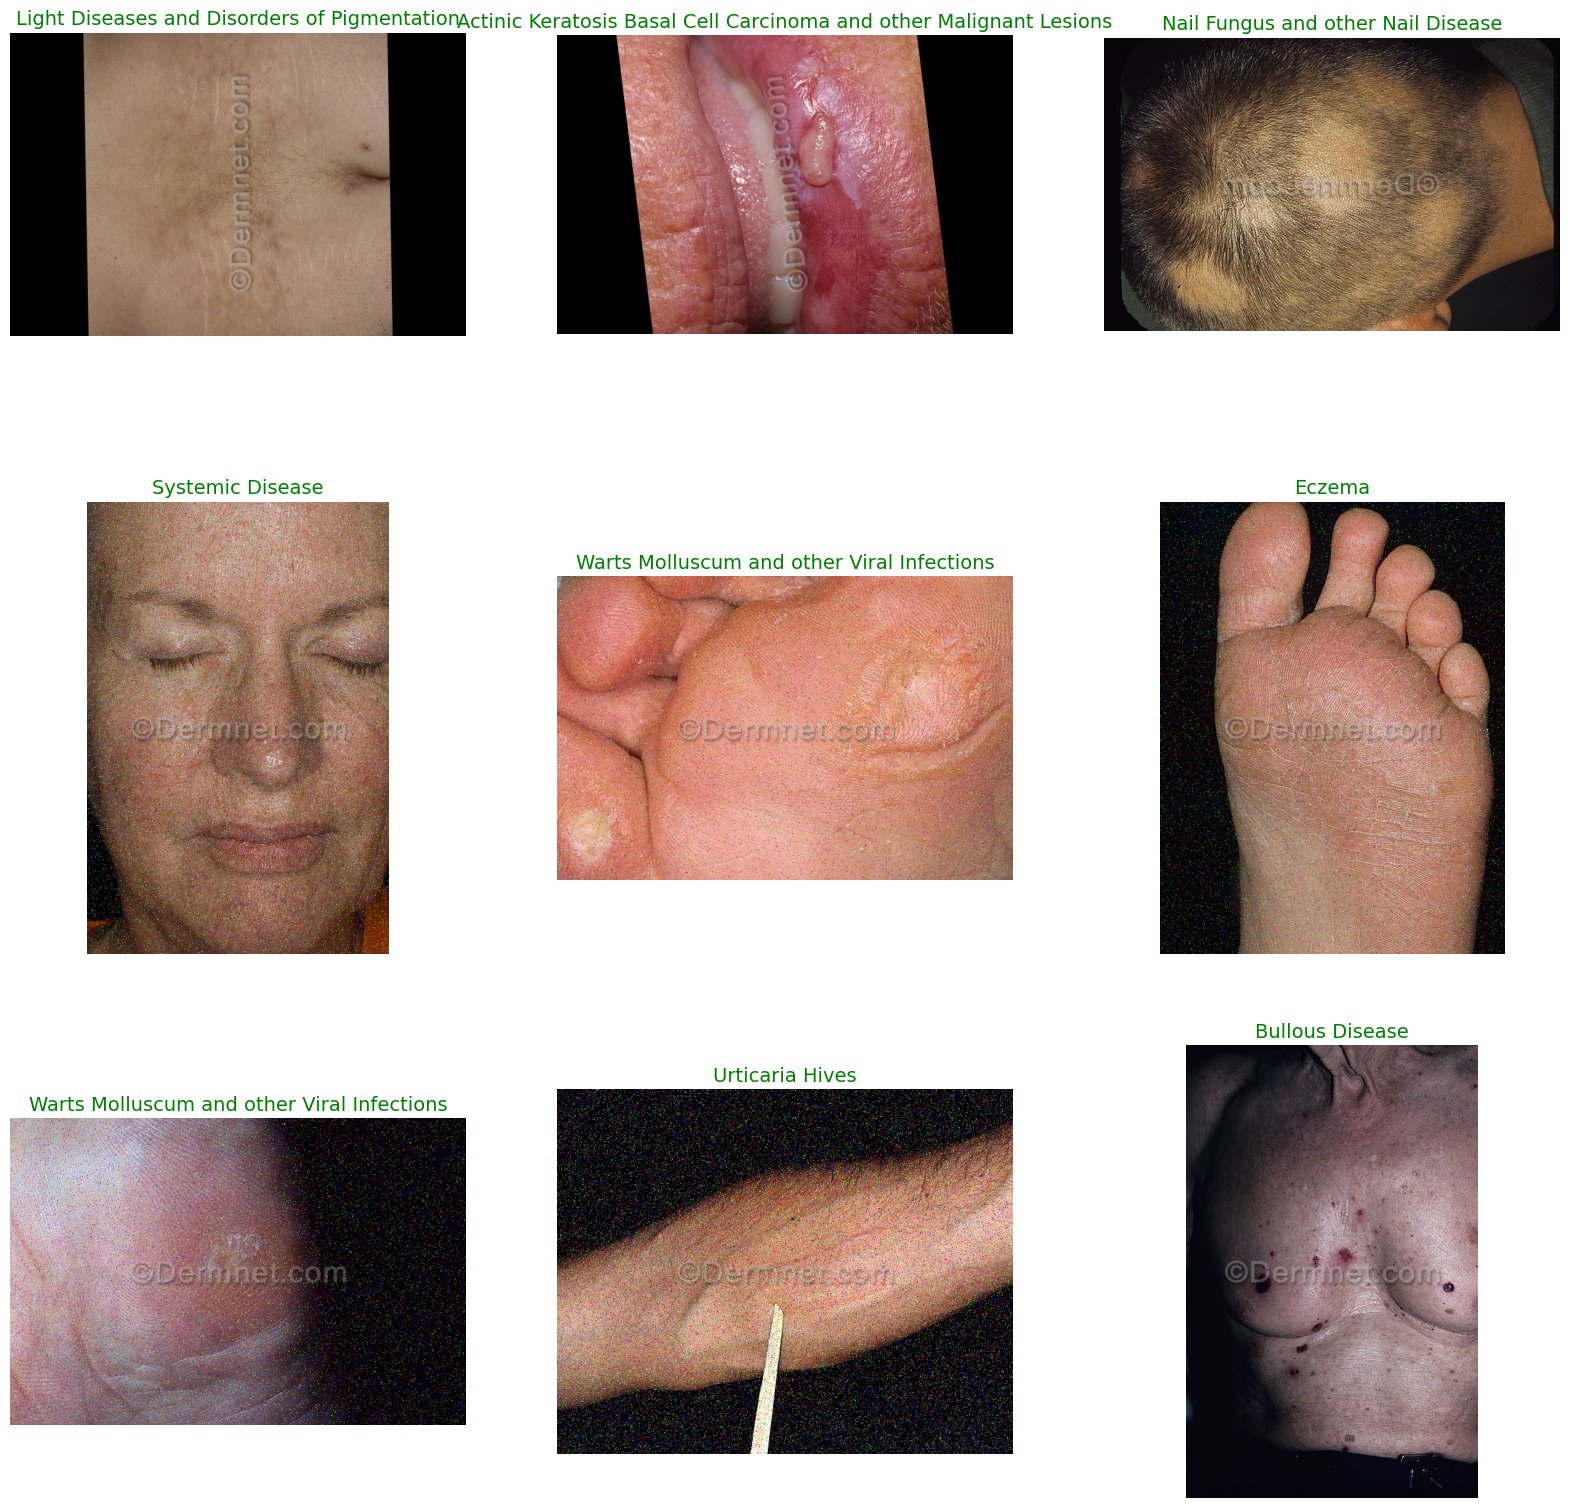

In [16]:
show_skin_images(skin_df)

# 📝Data Preprocessing

In [15]:
images=[]
for i in filepaths:
        img=cv2.imread(i)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img=cv2.resize(img,(180,180))
        img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)
        images.append(img)

In [16]:
data=np.array(images)

In [17]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Initialize the LabelEncoder
le = LabelEncoder()
le.fit(class_labels)
list(le.classes_)

# Fit and transform the labels to integer values
labels_encoded = le.transform(labels)
labels_categorical = to_categorical(labels_encoded, num_classes=23)

In [18]:
len(images)

24231

In [19]:
# Separate in train and test data
X_train,X_test, Y_train, Y_test=train_test_split(data, labels_categorical, test_size=0.2,random_state = np.random.randint(1,1000, 1)[0])
# Separate in train and validation data
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

# 🤹Training the model

In [22]:
from tensorflow.keras.applications import VGG19,InceptionResNetV2,MobileNetV2,EfficientNetB0,VGG16,InceptionV3,ResNet50,EfficientNetB3

In [23]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(180,180, 3))

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [24]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [25]:
from keras.layers import (Conv2D, MaxPooling2D, Dense, Flatten, \
                          Dropout, Input,GlobalAveragePooling2D,BatchNormalization)

In [26]:
x = base_model.output
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)

# Add a dense layer with L2 regularization
x = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(x)  # Adjust the value of 0.01 as needed for your regularization strength
x = BatchNormalization()(x)
x = Dropout(0.5)(x)  # Adjust the dropout rate as needed

# Repeat this for each layer where you want to add dropout and regularization
x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)  # Adjust the dropout rate as needed

x = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)  # Adjust the dropout rate as needed

predictions = Dense(23, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

In [27]:
# Compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=64,
                    epochs=80, validation_data=(X_val, Y_val),
                    steps_per_epoch=X_train.shape[0] // 64,
                    callbacks = [ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)])

Epoch 1/80
242/242 ━━━━━━━━━━━━━━━━━━━━ 80s 148ms/step - accuracy: 0.0947 - loss: 10.6372 - val_accuracy: 0.4127 - val_loss: 6.1234 - learning_rate: 0.0010
Epoch 2/80
  1/242 ━━━━━━━━━━━━━━━━━━━━ 1:02:17 16s/step - accuracy: 0.3158 - loss: 6.5419

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


242/242 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.3158 - loss: 6.5419 - val_accuracy: 0.4106 - val_loss: 6.1128 - learning_rate: 0.0010
Epoch 3/80
242/242 ━━━━━━━━━━━━━━━━━━━━ 14s 56ms/step - accuracy: 0.2436 - loss: 5.9887 - val_accuracy: 0.4965 - val_loss: 4.3984 - learning_rate: 0.0010
Epoch 4/80
242/242 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.4211 - loss: 4.9969 - val_accuracy: 0.4937 - val_loss: 4.3926 - learning_rate: 0.0010
Epoch 5/80
242/242 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step - accuracy: 0.3313 - loss: 4.6312 - val_accuracy: 0.5001 - val_loss: 3.8549 - learning_rate: 0.0010
Epoch 6/80
242/242 ━━━━━━━━━━━━━━━━━━━━ 44s 183ms/step - accuracy: 0.2105 - loss: 4.2132 - val_accuracy: 0.4991 - val_loss: 3.8571 - learning_rate: 0.0010
Epoch 7/80
242/242 ━━━━━━━━━━━━━━━━━━━━ 16s 67ms/step - accuracy: 0.3929 - loss: 4.1313 - val_accuracy: 0.5491 - val_loss: 3.6430 - learning_rate: 0.0010
Epoch 8/80
242/242 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.4737 - loss: 3.8768 

In [28]:
model.save('23classesEfficientNetB00.h5')

# ✔️Model Evaluation

In [20]:
from keras.models import load_model
# Load the model
model = load_model('/content/23classesEfficientNetB00.h5')

In [21]:
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)


X_train shape: (15507, 180, 180, 3)
Y_train shape: (15507, 23)
X_test shape: (4847, 180, 180, 3)
Y_test shape: (4847, 23)


In [22]:
results = model.evaluate(X_test,Y_test, verbose=0)

print("    Train Loss: {:.5f}".format(results[0]))
print("Train Accuracy: {:.2f}%".format(results[1] * 100))

    Train Loss: 0.61598
Train Accuracy: 97.61%


# 📊Plotting the Confusion Matrix and Classification Reports

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from mlxtend.plotting import plot_confusion_matrix

In [38]:
y_pred=model.predict(X_test)

152/152 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step


In [40]:
y_pred2=np.argmax(y_pred, axis=1)
y_pred2

array([ 8, 13, 14, ..., 18, 12,  8])

In [42]:
y_test=y_test=np.argmax(Y_test, axis=1)

array([ 8, 13, 14, ..., 18, 12,  8])

In [45]:
confusion_matrix_result=confusion_matrix(y_test,y_pred2)

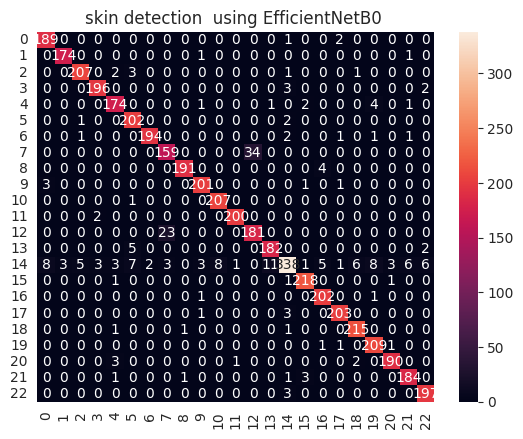

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl
plt.title("skin detection  using EfficientNetB0 ")

ax= plt.subplot()
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', ax=ax);
pl.show()

In [47]:
confusion_matrix=classification_report(y_test,y_pred2)

In [48]:
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       192
           1       0.98      0.99      0.99       176
           2       0.97      0.97      0.97       214
           3       0.98      0.98      0.98       201
           4       0.94      0.95      0.95       183
           5       0.93      0.99      0.96       205
           6       0.99      0.97      0.98       200
           7       0.86      0.82      0.84       193
           8       0.99      0.98      0.98       195
           9       0.97      0.98      0.97       206
          10       0.96      1.00      0.98       208
          11       0.99      0.99      0.99       202
          12       0.84      0.89      0.86       204
          13       0.94      0.96      0.95       189
          14       0.95      0.78      0.86       431
          15       0.97      0.99      0.98       221
          16       0.95      0.99      0.97       204
          17       0.97    

# 📉Visualizing loss curves

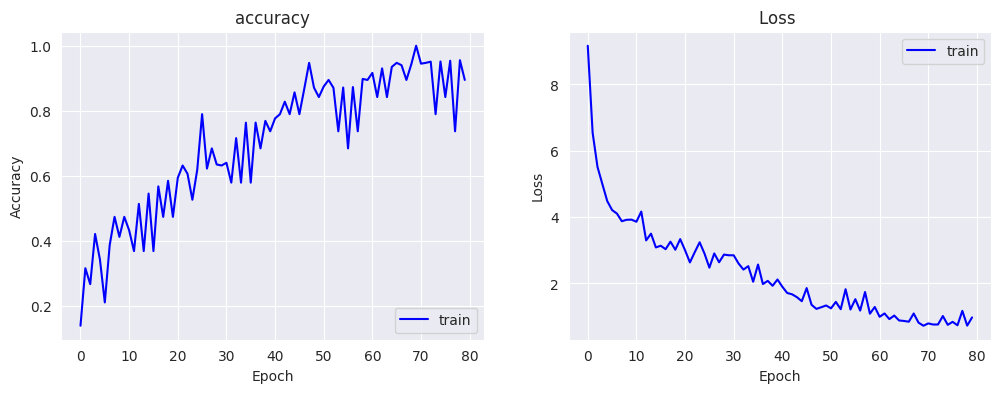

In [49]:
train_accuracy = history.history['accuracy']
#val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs = range(len(train_accuracy))
plt.figure(figsize=(12,4))
# Plotting the accuracy
plt.subplot(1,2,1)
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')

plt.title('accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='lower right')

# Plotting the loss
plt.subplot(1,2,2)
plt.plot(epochs, train_loss, 'b', label='Training loss')

plt.title('Loss ')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')

# 🔮Making predictions

In [59]:
def load_and_preprocess_image(img_path, target_size=(180, 180)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = cv2.cvtColor(img_array, cv2.COLOR_RGB2BGR)
    img_array = cv2.normalize(img_array, None, 0, 255, cv2.NORM_MINMAX)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

In [60]:
img_path = '/kaggle/input/dateset-23-skin/dataset/Eczema Photos/03ContactDermLids1.jpg'
img = load_and_preprocess_image(img_path)

In [61]:
predictions = model.predict(img)
predicted_index = np.argmax(predictions, axis=1)[0]
predicted_index

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


5

In [62]:
predicted_class = class_labels[predicted_index]
print(f"The model predicts that the image is: {predicted_class}")

The model predicts that the image is: Cellulitis Impetigo and other Bacterial Infections
